In [1]:
#Useful imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
import statsmodels
import statsmodels.stats as stats

from bokeh.io import output_notebook
output_notebook()
%matplotlib inline

Loading BokehJS ...

Uploaded on github <a href = "https://github.com/akashav1/global_terrorist_data" > Global terrorist data </a><br>
Dataset:- Global Terrorism Database <br>
The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2016 which Includes information on more than 83,000 bombings, 18,000 assassinations, and 11,000 kidnappings. <br>
For each GTD incident, information is available on the date and location of the incident, the weapons used and nature of the target, the number of casualties, and--when identifiable--the group or individual responsible.<br>
Analysing this database will help us understand what was the most commonly weapon used in the attack, which organization is responsible for most of the attacks<br>
We can also know on what basis these terrorists select their location<br>
For more details <a href="http://start.umd.edu/gtd/">Click here</a>

In [2]:
terror=pd.read_csv('https://raw.githubusercontent.com/akashav1/global_terrorist_data/master/globalterrorismdb_0617dist.csv',encoding='ISO-8859-1')

C:\Users\akash\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (27,29,57,58,59,72,75,90,92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
terror.tail()

,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,latitude,...,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill
170345,2016,12,31,146,Niger,11,Sub-Saharan Africa,Diffa,Garoua,13.883032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
170346,2016,12,31,160,Philippines,5,Southeast Asia,Maguindanao,Talitay,7.027067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A roadside bomb was used in the attack.,0.0
170347,2016,12,31,229,Democratic Republic of the Congo,11,Sub-Saharan Africa,Bas-Uele,Nakolongbo,4.308611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
170348,2016,12,31,130,Mexico,1,North America,Chihuahua,Guachochi,26.819644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multiple 9-mm pistols were used in the attack.,0.0
170349,2016,12,30,195,Sudan,11,Sub-Saharan Africa,Central Darfur,Nertiti,12.961401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [4]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Data columns (total 95 columns):
iyear               170350 non-null int64
imonth              170350 non-null int64
iday                170350 non-null int64
country             170350 non-null int64
country_txt         170350 non-null object
region              170350 non-null int64
region_txt          170350 non-null object
provstate           155848 non-null object
city                169904 non-null object
latitude            165744 non-null float64
longitude           165744 non-null float64
specificity         170346 non-null float64
vicinity            170350 non-null int64
location            47974 non-null object
summary             104212 non-null object
crit1               170350 non-null int64
crit2               170350 non-null int64
crit3               170350 non-null int64
doubtterr           170350 non-null int64
alternative         26631 non-null float64
alternative_txt     26631 non-null ob

In [5]:
#renaming the columns for easy convenience
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror.head()

,Year,Month,Day,country,Country,region,Region,provstate,city,latitude,...,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,Killed
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1970,0,0,130,Mexico,1,North America,NaN,Mexico city,19.432608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,37.983773,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN
4,1970,1,0,101,Japan,4,East Asia,NaN,Fukouka,33.580412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incendiary,NaN


In [6]:
#Removing all unnecessary columns
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Target','Group','Target_type','Weapon_type','Motive','nperps']]

In [7]:
terror.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Target,Group,Target_type,Weapon_type,Motive,nperps
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,NaN,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,NaN,7.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,Employee,Unknown,Journalists & Media,Unknown,NaN,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.983773,23.728157,Bombing/Explosion,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives/Bombs/Dynamite,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [8]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Data columns (total 16 columns):
Year           170350 non-null int64
Month          170350 non-null int64
Day            170350 non-null int64
Country        170350 non-null object
Region         170350 non-null object
city           169904 non-null object
latitude       165744 non-null float64
longitude      165744 non-null float64
AttackType     170350 non-null object
Killed         160668 non-null float64
Target         169714 non-null object
Group          170350 non-null object
Target_type    170350 non-null object
Weapon_type    170350 non-null object
Motive         48586 non-null object
nperps         99226 non-null float64
dtypes: float64(4), int64(3), object(9)
memory usage: 20.8+ MB


In [9]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              446
latitude         4606
longitude        4606
AttackType          0
Killed           9682
Target            636
Group               0
Target_type         0
Weapon_type         0
Motive         121764
nperps          71124
dtype: int64

In [10]:
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1500.0 that took place in Iraq


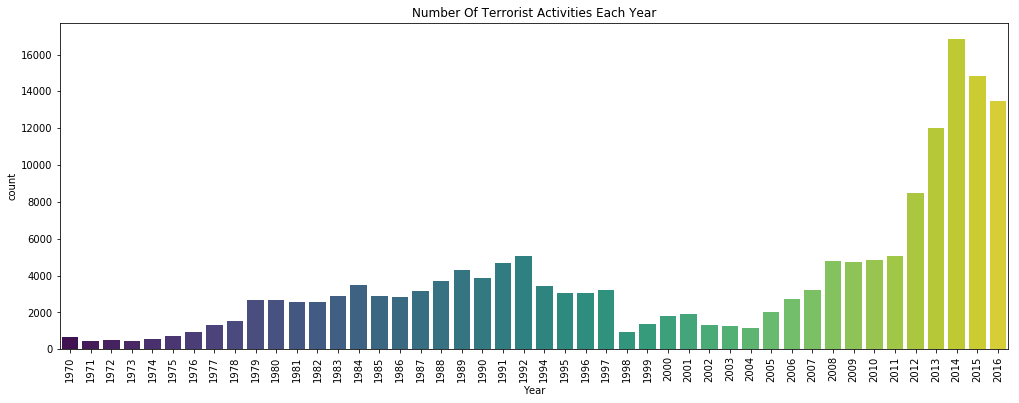

In [11]:
plt.subplots(figsize=(17,6))
sns.countplot(terror['Year'],palette='viridis')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

We can see that the attacks were less at the starting in 1970 but it gradually increased through 1992 then after there was a decrease in number of attacks till 2007 but after 2011 there was a sudden rise in the number of attacks

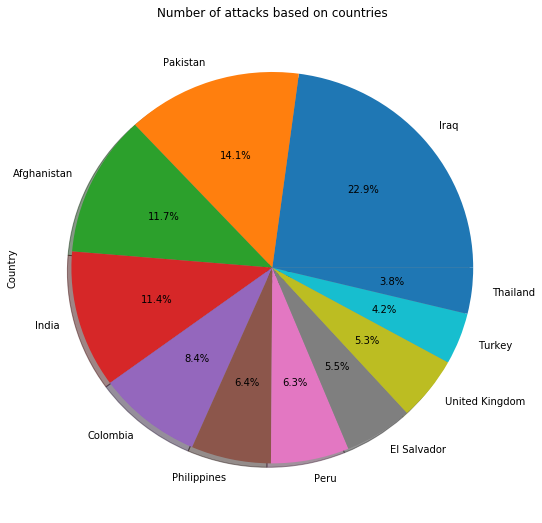

In [12]:
plt.figure(figsize=(9,9))
terror['Country'].value_counts()[:11].plot(kind='pie',autopct='%1.1f%%',shadow=True)
plt.title('Number of attacks based on countries')
plt.show()

We can see that Iraq has the highest number of attacks. It is mostly seen that country with more number of people have more number of attacks

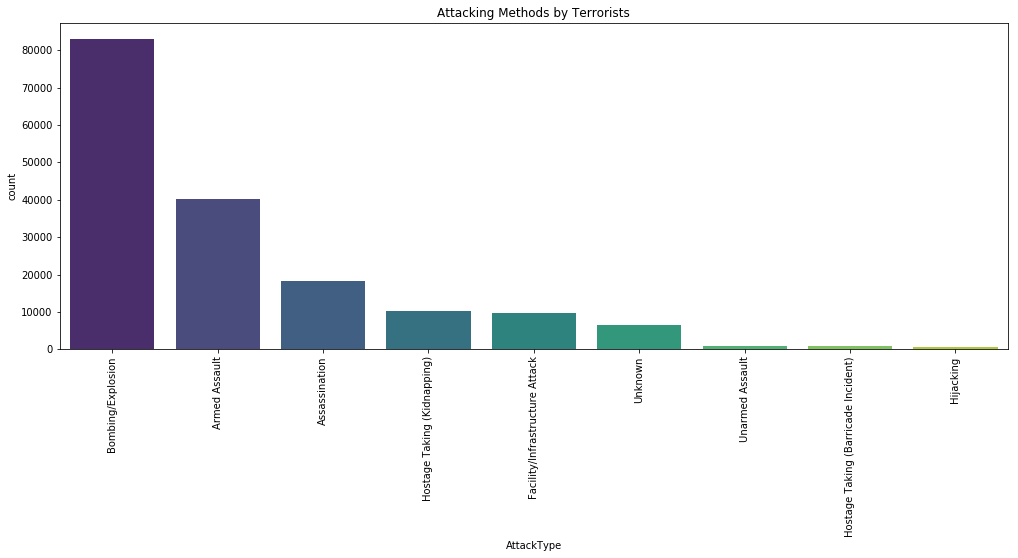

In [13]:
plt.subplots(figsize=(17,6))
sns.countplot('AttackType',data=terror,palette='viridis',order=terror['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

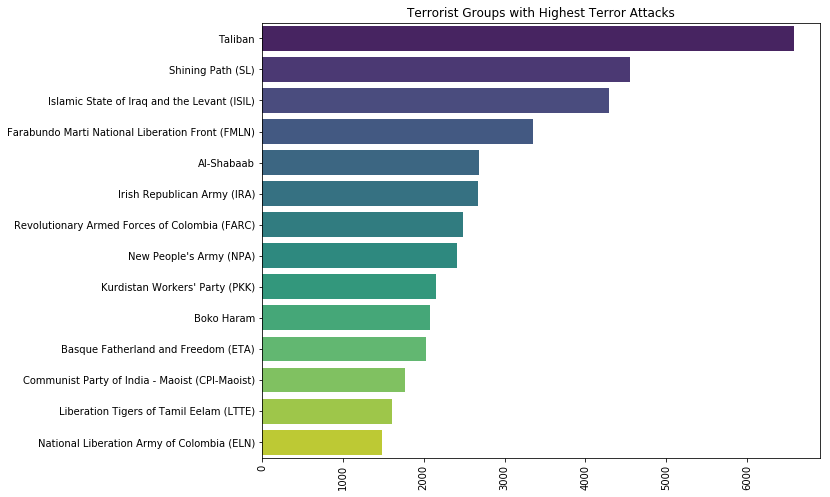

In [14]:
sns.barplot(terror['Group'].value_counts()[1:15].values,terror['Group'].value_counts()[1:15].index,palette=('viridis'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

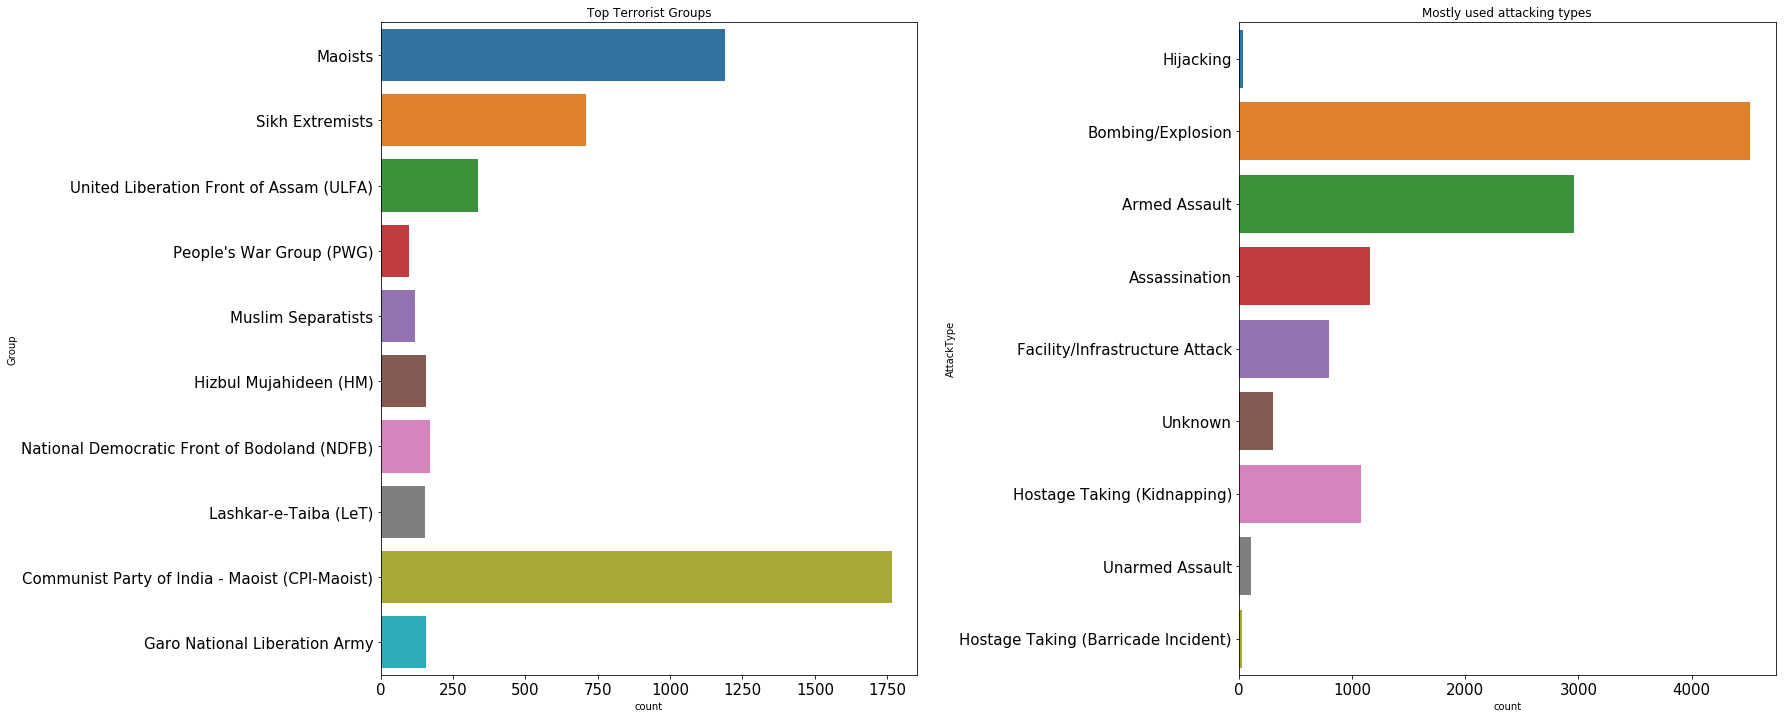

In [15]:
terror_india=terror[terror['Country']=='India']
f,ax=plt.subplots(1,2,figsize=(25,12))
ind_groups=terror_india['Group'].value_counts()[1:11].index
ind_groups=terror_india[terror_india['Group'].isin(ind_groups)]
sns.countplot(y='Group',data=ind_groups,ax=ax[0])
ax[0].set_title('Top Terrorist Groups')
sns.countplot(y='AttackType',data=terror_india,ax=ax[1])
ax[1].set_title('Mostly used attacking types')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

In [16]:
terror.describe(include='all')

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Target,Group,Target_type,Weapon_type,Motive,nperps
count,170350.000000,170350.000000,170350.000000,170350,170350,169904,165744.000000,165744.000000,170350,160668.000000,169714,170350,170350,170350,48586,99226.000000
unique,NaN,NaN,NaN,205,12,33957,NaN,NaN,9,NaN,82974,3454,22,12,13033,NaN
top,NaN,NaN,NaN,Iraq,Middle East & North Africa,Unknown,NaN,NaN,Bombing/Explosion,NaN,Civilians,Unknown,Private Citizens & Property,Explosives/Bombs/Dynamite,Unknown,NaN
freq,NaN,NaN,NaN,22130,46511,9162,NaN,NaN,83073,NaN,5810,78306,39994,86704,14894,NaN
mean,2001.709997,6.474365,15.466845,NaN,NaN,NaN,23.399774,26.350909,NaN,2.387246,NaN,NaN,NaN,NaN,NaN,-63.924536
std,13.144146,3.392364,8.817929,NaN,NaN,NaN,18.844885,58.570068,NaN,11.327709,NaN,NaN,NaN,NaN,NaN,227.997149
min,1970.000000,0.000000,0.000000,NaN,NaN,NaN,-53.154613,-176.176447,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,-99.000000
25%,1990.000000,4.000000,8.000000,NaN,NaN,NaN,11.263580,2.396199,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,-99.000000
50%,2007.000000,6.000000,15.000000,NaN,NaN,NaN,31.472680,43.130000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,-99.000000
75%,2014.000000,9.000000,23.000000,NaN,NaN,NaN,34.744167,68.451297,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000


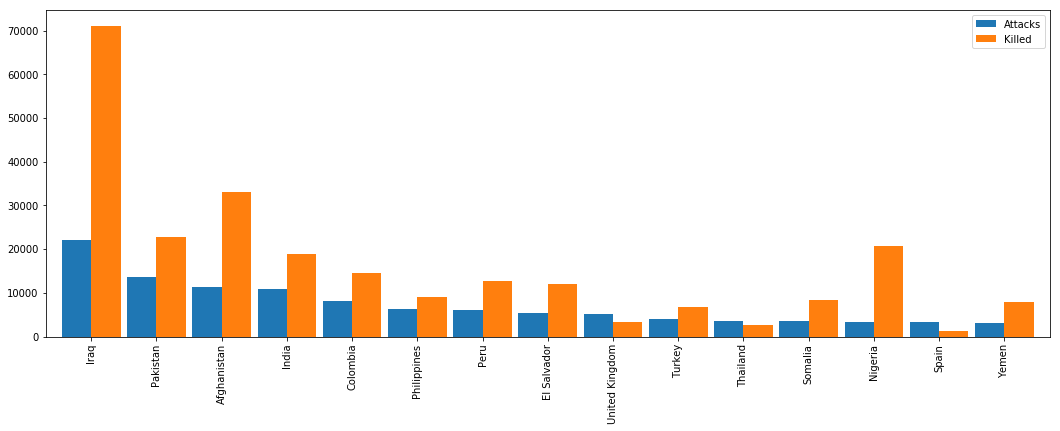

In [17]:
coun_terror=terror['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=terror.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In a previous graph we have seen that Iraq had the highest number of attacks and in this graph we can see that there is huge difference in ration of attacks to killed between Iraq and other countries. <br>
This shows that the terrorist select places with dense population for the attack

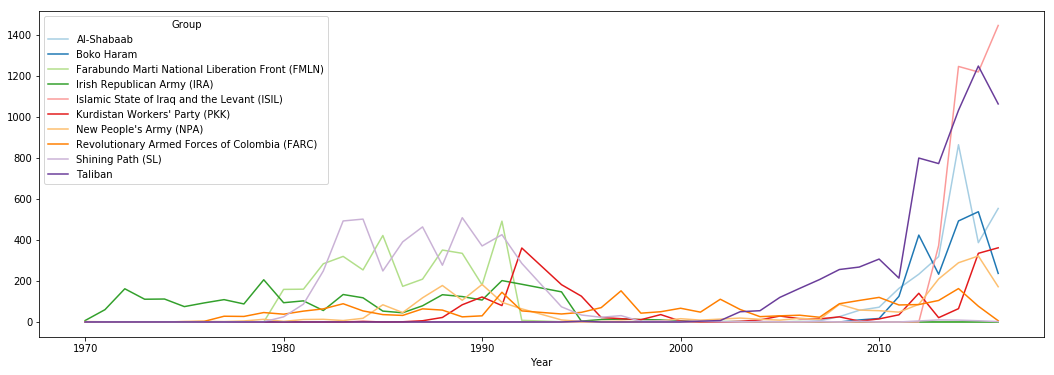

In [18]:
top_groups10=terror[terror['Group'].isin(terror['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

We can see that ISIL has started more terrorist activities after 2011 and also they are responsible for highest number of attacks till today

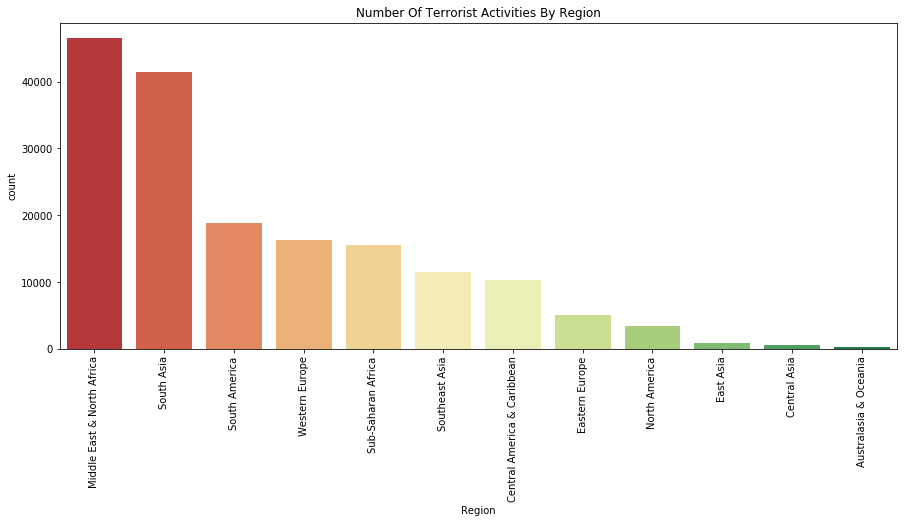

In [19]:
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=terror,palette='RdYlGn',order=terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

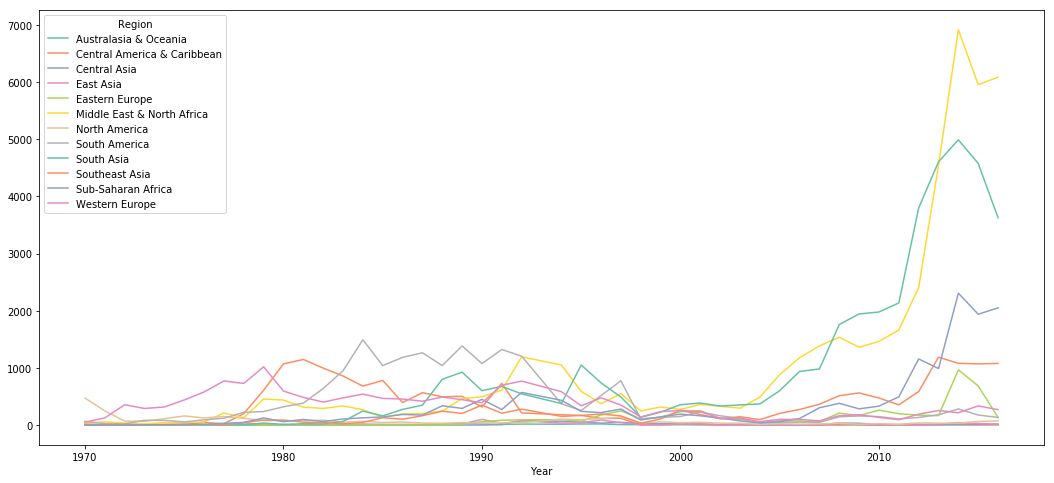

In [20]:
terror_region=pd.crosstab(terror['Year'],terror['Region'])
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.show()

Middle East and North Africa have seen more attacks in the past years. Also they have had the highest number of terrorist attacked in an year <br>
Also it can be noted that North America has the lost number of attacks from 1970 till today

Text(0,0.5,'No of persons involved')

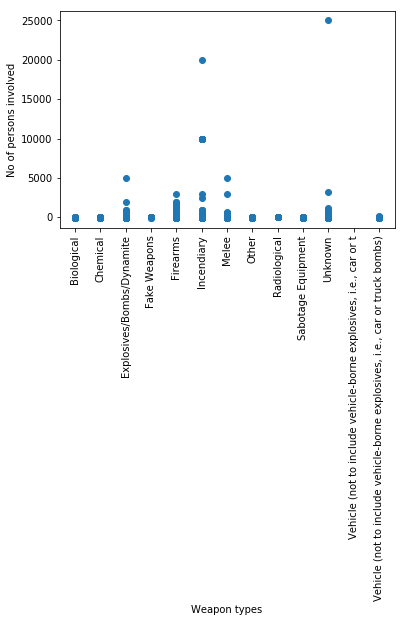

In [21]:
x = terror['Weapon_type']
y = terror['nperps']
plt.scatter(x, y)
plt.xticks(rotation=90)
plt.xlabel('Weapon types')
plt.ylabel('No of persons involved')

This graph shows the number of person involved in the attack based on the weapons they used in the attack.<br>
But based on the graph we are not able to properly say the number of people as there are many values between 0 to 5000 so we will created a box plot for it

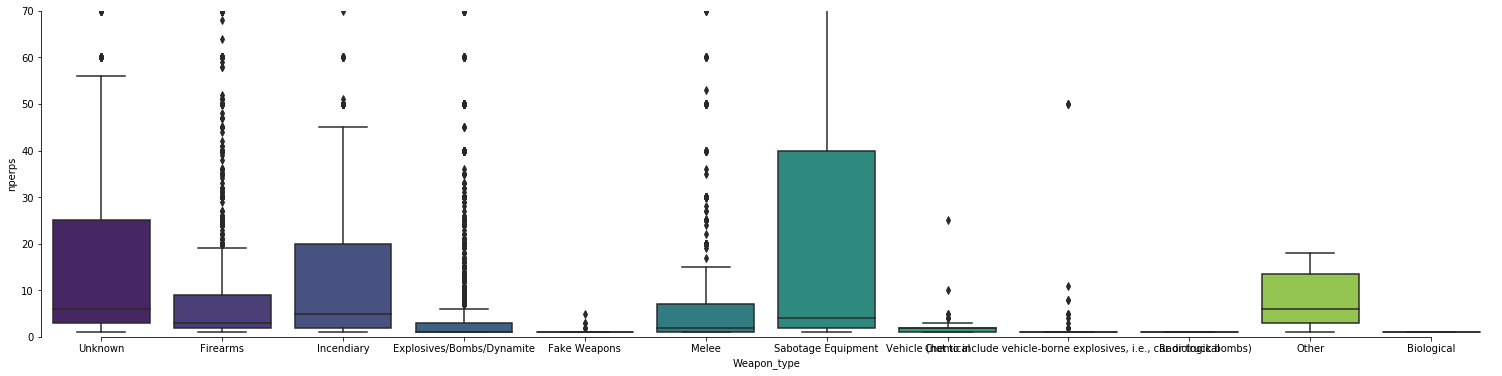

In [22]:
data_plot = terror[terror.nperps > 0]

plt.figure(figsize=(26,6))
plt.ylim(0, 70)
sns.boxplot(x="Weapon_type", y="nperps", data=data_plot, palette="viridis")
sns.despine(offset=0, trim=True)


Based on the box plot we can say that most of the attacks had less than 20 people involved. Most of the attacking methords are unknown